# Importing the libraries

In [1]:
import pandas as pd
import  numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Reading the data

In [2]:
df=pd.read_csv('../input/mushroom-classification/mushrooms.csv')

# Understanding the data

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [8]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
df[df['class']=='e'].describe().T

,count,unique,top,freq
class,4208,1,e,4208
cap-shape,4208,5,x,1948
cap-surface,4208,3,f,1560
cap-color,4208,10,n,1264
bruises,4208,2,t,2752
odor,4208,3,n,3408
gill-attachment,4208,2,f,4016
gill-spacing,4208,2,c,3008
gill-size,4208,2,b,3920
gill-color,4208,10,w,956


In [10]:
df[df['class']=='p'].describe().T

,count,unique,top,freq
class,3916,1,p,3916
cap-shape,3916,5,x,1708
cap-surface,3916,4,y,1740
cap-color,3916,8,n,1020
bruises,3916,2,f,3292
odor,3916,7,f,2160
gill-attachment,3916,2,f,3898
gill-spacing,3916,2,c,3804
gill-size,3916,2,n,2224
gill-color,3916,10,b,1728


In [11]:
X=df.drop('class',axis=1)
y=df['class']

In [12]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [13]:
y.head()

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

# Encoding categorical values

In [14]:
Encoder_x=LabelEncoder()
for col in X.columns:
    X[col]=Encoder_x.fit_transform(X[col])
Encoder_y=LabelEncoder()
y=Encoder_y.fit_transform(y)

In [15]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [16]:
y

array([1, 0, 0, ..., 0, 1, 0])

# Building the model - KNN

Spliting the data for training and testing

In [17]:
train_x,test_x,train_y,test_y=train_test_split(X,y)

**Finding most accurate K value**

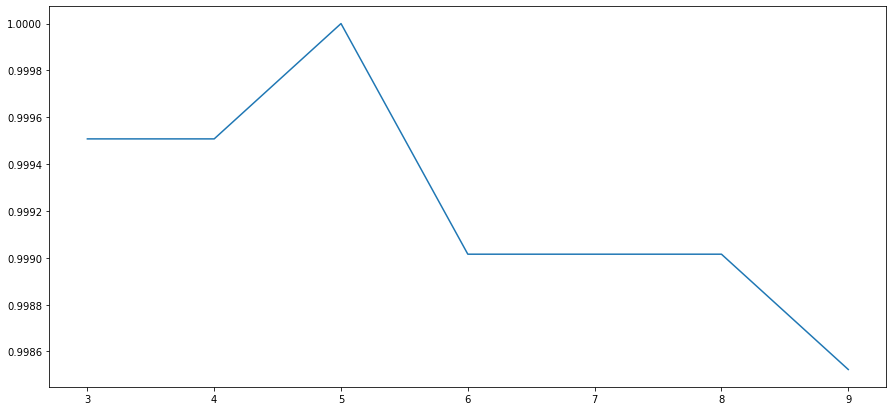

In [18]:
acc = []
for neighbors in range(3,10,1):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(train_x,train_y)
    y_pred = classifier.predict(test_x)
    acc.append(accuracy_score(test_y,y_pred))
    
plt.figure(figsize=(15,7))
plt.plot(list(range(3,10,1)), acc)
plt.show()

In [19]:
print(f"Best accuracy is {np.max(acc)} and the k value is {1+acc.index(np.max(acc))}")

Best accuracy is 1.0 and the k value is 3


In [20]:
k=1+acc.index(np.max(acc))
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(train_x,train_y)
pred=knn.predict(test_x)

In [21]:
print("Mean absolute error:",mean_absolute_error(pred,test_y))

Mean absolute error: 0.0004923682914820286


In [22]:
pred2=[]
for i in pred:
    if i==1:
        pred2.append('p')
    else:
        pred2.append('e')
        
# pred=map(lambda x:'p' if x==1 else 'e',pred)

In [23]:
pred2=pd.DataFrame({'index':test_x.index,'class':pred2})
pred2.head()

,index,class
0,7223,p
1,3191,p
2,2175,e
3,7670,p
4,1838,e


# Random Forest Classifier

In [24]:
model=RandomForestClassifier(random_state=1)
model.fit(train_x,train_y)
pred=model.predict(test_x)

In [25]:
print("Model score:",model.score(test_x,test_y))
print("Mean absolute error:",mean_absolute_error(pred,test_y))
print("Accuracy score:",accuracy_score(pred,test_y))

Model score: 1.0
Mean absolute error: 0.0
Accuracy score: 1.0


In [26]:
pred=map(lambda x:'p' if x==1 else 'e',pred)

# Creating Output file

In [27]:
pred2=pd.DataFrame({'index':test_x.index,'class':pred})
pred2.head()

,index,class
0,7223,p
1,3191,p
2,2175,e
3,7670,p
4,1838,e


In [28]:
pred2.to_csv('submission.csv',index=False)